# Visualization example

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load

In [15]:
"""Load dataset"""
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Matplotlib
Native Python plotting library. Scatterplot `size` vs. `total_bill` and color by day

In [131]:
"""Get data"""
x = df['size']
y = df.total_bill
day = df.day

"""Colors"""
# Create a day color palette
day_pal = dict(zip(day.unique(), sns.color_palette()))
# Get list of colors
colors = day.astype(str).map(day_pal)
day_pal

{'Sun': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'Sat': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Thur': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'Fri': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)}

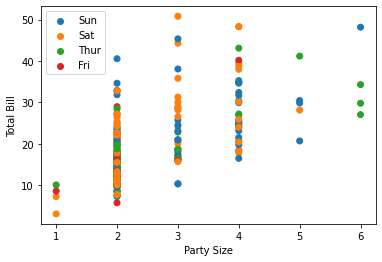

In [119]:
"""Scatterplot"""
plt.scatter(x, y, c=colors)
plt.xlabel('Party Size')
plt.ylabel('Total Bill')
# Create legend
handles = [plt.scatter([], [], label=d, color=c, marker='o') for d, c in day_pal.items()]
plt.legend(handles, [h.get_label() for h in handles])
plt.show()

In [36]:
"""Let's plot mean bill for each party size"""
mean_bill = df.groupby(['day', 'size']).total_bill.mean().reset_index()
mean_bill.head()

,day,size,total_bill
0,Thur,1,10.070000
1,Thur,2,15.156875
2,Thur,3,19.160000
3,Thur,4,29.950000
4,Thur,5,41.190000


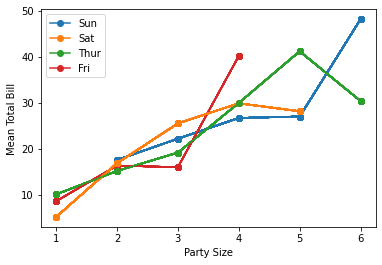

In [120]:
# Plot each day as a separate line
for d in day:
    # Get data associated with that day
    data_d = mean_bill[mean_bill.day.eq(d)]
    x_d = data_d['size']
    y_d = data_d.total_bill
    c = day_pal[d]
    plt.plot(x_d, y_d, color=c, marker='o')
plt.xlabel('Party Size')
plt.ylabel('Mean Total Bill')
handles = [plt.plot([], [], label=d, color=c, marker='o')[0] for d, c in day_pal.items()]
plt.legend(handles, [h.get_label() for h in handles])
plt.show()

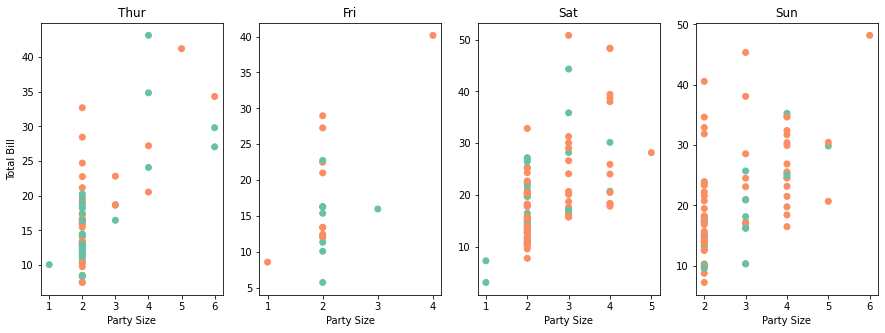

In [98]:
"""Each day as a separate subplot"""
fig, axs = plt.subplots(ncols=day.nunique(), figsize=(15,5))
# Color by time of day
sex_pal = dict(zip(df.sex.unique(), sns.color_palette('Set2')))

for ax, d in zip(axs, ['Thur', 'Fri', 'Sat', 'Sun']):
    # Get data associated with that day
    data_d = df[df.day.eq(d)]
    x_d = data_d['size']
    y_d = data_d.total_bill
    c = data_d.sex.astype(str).map(sex_pal)
    ax.scatter(x_d, y_d, color=c, marker='o')
    ax.set_title(d)
    ax.set_xlabel('Party Size')
    if d == 'Thur':
        ax.set_ylabel('Total Bill')
plt.show()

# Ok enough with that, let's look at Seaborn
Seaborn is a wrapper around matplotlib and allows you to use pandas dataframes to specify your plots

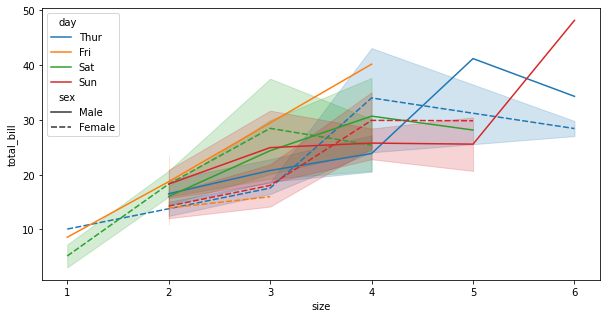

In [104]:
"""Scatterplot colored by day, shapes by sex"""
plt.figure(figsize=(10, 5))
sns.lineplot(x='size', y='total_bill', hue='day', style='sex', data=df)
plt.show()

Bootstrapping for confidence intervals **and** automatic legend creation!!

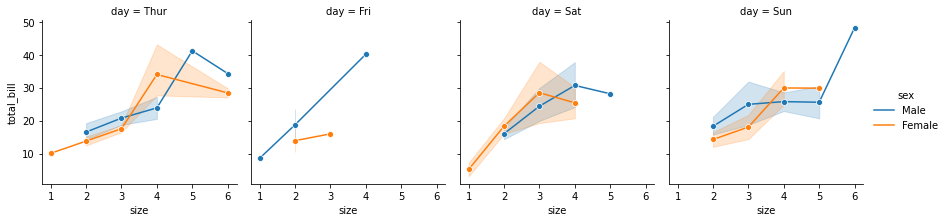

In [109]:
"""Let's break that up by day"""
g = sns.relplot(x='size', y='total_bill', col='day', hue='sex', data=df, height=3, kind='line', marker='o')
plt.show()

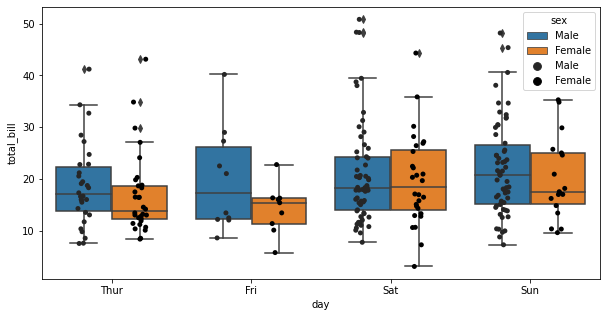

In [117]:
"""What about distributions?!"""
args = ('day', 'total_bill', 'sex')
order = ['Thur', 'Fri', 'Sat', 'Sun']
hue_order = ['Male', 'Female']
kwargs = {'x': 'day', 'y': 'total_bill', 'hue': 'sex', 'order': order, 'hue_order': hue_order, 'data': df}
plt.figure(figsize=(10, 5))
sns.boxplot(**kwargs)
sns.stripplot(**kwargs, dodge=True, color='k')
plt.show()

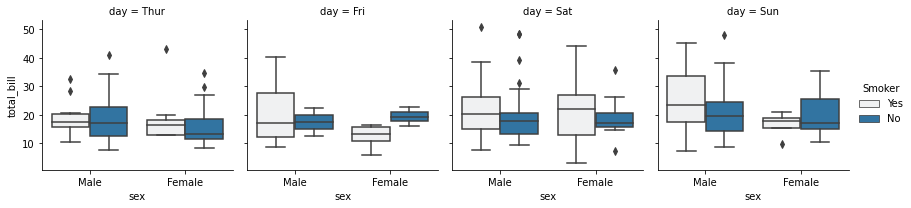

In [128]:
"""Let's break distributions down further"""
g = sns.FacetGrid(df, col='day')
g.map(sns.boxplot, 'sex', 'total_bill', 'smoker', order=['Male', 'Female'], hue_order=['Yes', 'No']).add_legend(title='Smoker')
plt.show()